In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from IPython.display import SVG

from sklearn.metrics import r2_score


#from keras.utils.vis_utils import model_to_dot
#from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


from IPython.display import Image
import glob
import cv2
import random


from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam

In [5]:
my_Path = 'train_val/'

files = list(glob.glob(my_Path+'*.jpg'))
files
len(files)
files[0:5]

['train_val\\100_1_0_20170112215032192.jpg.chip.jpg',
 'train_val\\100_1_2_20170112213615815.jpg.chip.jpg',
 'train_val\\10_0_0_20161220222308131.jpg.chip.jpg',
 'train_val\\10_1_0_20170109203245653.jpg.chip.jpg',
 'train_val\\116_1_3_20170120134744096.jpg.chip.jpg']

In [15]:
img = cv2.imread(files[1])

In [9]:
img.shape

(128, 128, 3)

In [34]:
df = pd.read_csv('df.csv', index_col= 0)

df.loc[df['Gender'] == 1, 'Gender'] = True
df.loc[df['Gender'] == 0, 'Gender'] = False

                 


C:\Users\SHEKHAR\AppData\Local\Temp\ipykernel_16508\3067218790.py:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_49144,p_49145,p_49146,p_49147,p_49148,p_49149,p_49150,p_49151,Gender,Age
0,14,16,17,34,37,41,85,89,94,117,...,32,30,21,29,28,7,15,14,1,99
1,154,151,173,154,152,174,155,152,178,152,...,236,231,197,191,184,149,142,133,0,87


In [35]:
X   = df.drop(['Age', 'Gender'], axis = 1)
y = df['Gender']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [36]:
image_rows = 128
image_cols = 128
batch_size = 4096


image_shape = (image_rows,image_cols,3)
train_data = np.array(X_train, dtype = 'float32')
test_data = np.array(X_test, dtype='float32')


#x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [37]:
len(train_data[0])

49152

In [38]:
train_data

array([[103., 103.,  97., ...,  41.,  28.,  26.],
       [ 93.,  92., 131., ...,  58.,  13.,   2.],
       [ 64.,  99., 142., ...,  88., 123., 167.],
       ...,
       [ 62.,  78., 121., ..., 143., 147., 165.],
       [ 99., 160., 192., ..., 201., 201., 201.],
       [ 87.,  96.,  99., ...,  75.,  88., 126.]], dtype=float32)

In [39]:
x_train = train_data/255

x_test= test_data/255

x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)

In [40]:
x_train

array([[[[0.40392157, 0.40392157, 0.38039216],
         [0.3764706 , 0.3764706 , 0.3529412 ],
         [0.3882353 , 0.39215687, 0.3764706 ],
         ...,
         [0.68235296, 0.65882355, 0.6313726 ],
         [0.61960787, 0.58431375, 0.5686275 ],
         [0.52156866, 0.4862745 , 0.47058824]],

        [[0.40392157, 0.40392157, 0.38039216],
         [0.39607844, 0.39607844, 0.37254903],
         [0.40392157, 0.40784314, 0.39215687],
         ...,
         [0.6745098 , 0.6509804 , 0.62352943],
         [0.63529414, 0.6       , 0.58431375],
         [0.5568628 , 0.52156866, 0.5058824 ]],

        [[0.40392157, 0.40392157, 0.38039216],
         [0.41960785, 0.41960785, 0.39607844],
         [0.42352942, 0.42745098, 0.4117647 ],
         ...,
         [0.65882355, 0.63529414, 0.60784316],
         [0.64705884, 0.62352943, 0.6039216 ],
         [0.6039216 , 0.5803922 , 0.56078434]],

        ...,

        [[0.8980392 , 0.81960785, 0.7490196 ],
         [0.94509804, 0.8666667 , 0.79607844]

In [60]:
y_train

90     False
66      True
38      True
55      True
98     False
       ...  
106    False
14      True
92      True
179    False
102    False
Name: Gender, Length: 139, dtype: object

In [66]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = (128, 128, 3)),
    MaxPooling2D(pool_size=2) ,
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(1, activation='sigmoid')
    
])


cnn_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [67]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=10,
    verbose=1,
    validation_data=(x_test,y_test),
)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type bool).

In [64]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

c:\Users\SHEKHAR\.conda\envs\aws\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [63]:
classifier.fit_generator(x_train,
                         steps_per_epoch = 8000,
                         epochs = 25,
                         validation_data = x_test,
                         validation_steps = 2000)

AttributeError: 'Sequential' object has no attribute 'fit_generator'

In [65]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'..\dataset\training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 4,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(r'..\dataset\test_set',
                                            target_size = (64, 64),
                                            batch_size = 4,
                                            class_mode = 'binary')

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (c:\Users\SHEKHAR\.conda\envs\aws\lib\site-packages\keras\api\preprocessing\image\__init__.py)

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [69]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


In [70]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


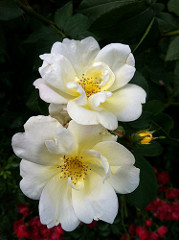

In [71]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [72]:
data_dir

WindowsPath('C:/Users/SHEKHAR/.keras/datasets/flower_photos')

In [73]:
roses[0]

WindowsPath('C:/Users/SHEKHAR/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

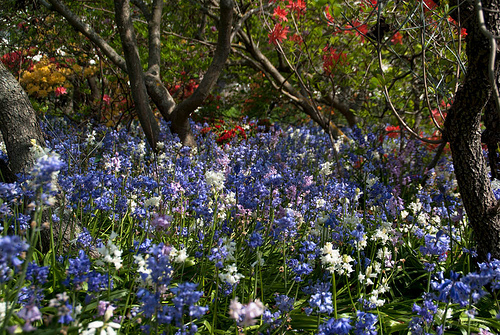

In [75]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))
PIL.Image.open(str(tulips[1]))

In [76]:
batch_size = 32
img_height = 180
img_width = 180

In [97]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [98]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [99]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [100]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [85]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'E:\Projects\Multi-CNN',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(128, 128),
  batch_size=batch_size)

Found 186 files belonging to 1 classes.


Using 149 files for training.


In [86]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [90]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [91]:
normalization_layer = layers.Rescaling(1./255)

In [92]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.99803925


In [101]:

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

c:\Users\SHEKHAR\.conda\envs\aws\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [102]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [104]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 203ms/step - accuracy: 0.3679 - loss: 1.4474 - val_accuracy: 0.5422 - val_loss: 1.0912
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 232ms/step - accuracy: 0.6033 - loss: 1.0045 - val_accuracy: 0.6172 - val_loss: 0.9375
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 236ms/step - accuracy: 0.6956 - loss: 0.8192 - val_accuracy: 0.6567 - val_loss: 0.9039
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 244ms/step - accuracy: 0.7434 - loss: 0.6759 - val_accuracy: 0.6390 - val_loss: 0.9451
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 244ms/step - accuracy: 0.8315 - loss: 0.4683 - val_accuracy: 0.6417 - val_loss: 1.0366
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 242ms/step - accuracy: 0.9024 - loss: 0.2842 - val_accuracy: 0.6649 - val_loss: 1.2249
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 238ms/step - accuracy: 0.9352 - loss: 0.1909 - val_accuracy: 0.6662 - val_loss: 1.4323
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 239ms/step - accuracy: 0.9636 - loss: 0.1074 - val_accu

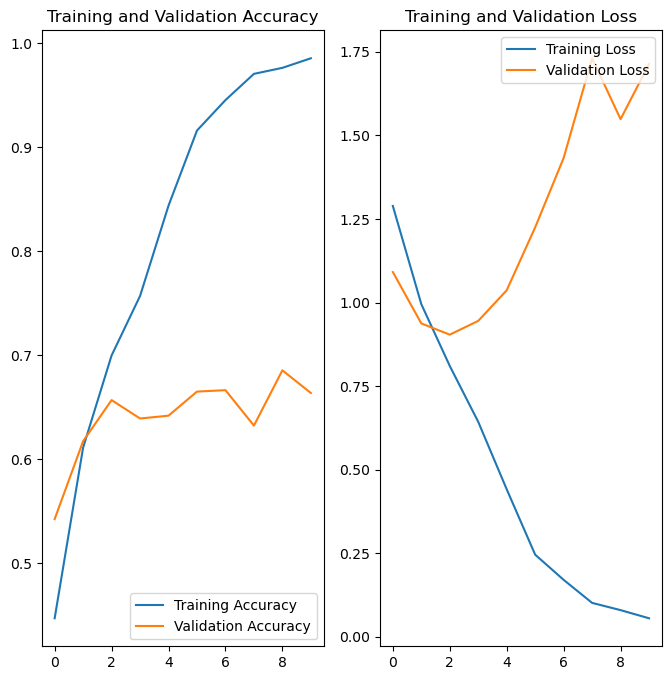

In [105]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()